In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from sklearn.utils import shuffle

In [2]:
!ls 

boilerplate.py	mnist			   trainingSet
data		mnist_tf-checkpoint.ipynb  vgg16.ipynb


In [3]:
def load_data(path):
    
    sub_paths = os.listdir(path)

    img_data = []
    label_data = []
    
    c = 0
    
    for sub_path in sub_paths:
        
        img_paths = os.listdir(path + '/' + sub_path)
        
        
        for img_path in img_paths:
            
            img = cv2.imread(path + sub_path + '/' + img_path , 0)

            label = int(sub_path)
            
            print(img_data.append(img))
            label_data.append(label)
            
            c = c + 1
            
        print (sub_path)
        
    img_data = np.expand_dims(np.array(img_data),-1) #converting  to a numpy array
    #label_data = tf.one_hot(label_data, 10).eval(session = sess) # one_hot representation
    label_data = to_one_hot(label_data, 10)
    
    img_data, label_data = shuffle(img_data, label_data, random_state=0)
    return img_data, label_data 

In [4]:
def to_one_hot(label_data, num_class):
    num_sample = np.shape(label_data)[0]
    temp = np.zeros([num_sample, num_class])
    temp[np.arange(num_sample),label_data] = 1
    return temp

In [5]:
def Network(Input): #input : [Batch_size, 32, 32, 1]
    with tf.name_scope("Network"):
        conv1 = tf.layers.conv2d(Input, filters = 64, kernel_size = 3, strides = 1, activation = tf.nn.relu, name = 'conv1')
        conv2 = tf.layers.conv2d(conv1, filters = 64, kernel_size = 3, strides = 1, activation = tf.nn.relu, name = 'conv2')
        pool1 = tf.layers.max_pooling2d(conv2, pool_size = 2, strides = 2, name = 'pool1')

        conv3 = tf.layers.conv2d(pool1, filters = 256, kernel_size = 3, strides = 1, activation = tf.nn.relu, name = 'conv3')
        conv4 = tf.layers.conv2d(conv3, filters = 256, kernel_size = 3, strides = 1, activation = tf.nn.relu, name = 'conv4')
        pool2 = tf.layers.max_pooling2d(conv4, pool_size = 2, strides = 2, name = 'pool2')

        conv5 = tf.layers.conv2d(pool2, filters = 512, kernel_size = 3, strides = 1, activation = tf.nn.relu, name = 'conv5')

        flat = tf.contrib.layers.flatten(conv5)
        fc1 = tf.layers.dense(flat, units = 1024, activation = tf.nn.relu, name = 'fc1')
        fc2 = tf.layers.dense(fc1, units = 10, activation = None, name = 'fc2')
    
    return fc2
    
    

In [6]:
def loss_function(logit, Label):
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Label))
    return loss

In [7]:
def Accuracy_Evaluate(prediction, Label):
    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return correct_pred, accuracy

In [8]:
def main(train_data, train_label, no_of_epochs = 150000, batchsize = 32):
    
    
    Input = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28, 1])
    Label = tf.placeholder(dtype = tf.float32, shape = [None, 10])
    
    logit = Network(Input)
    
    prediction = tf.nn.softmax(logit)
    
    loss = loss_function(logit, Label)
    
    correct_pred, accuracy = Accuracy_Evaluate(prediction, Label)
    
    
    optimiz = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

    init = tf.global_variables_initializer()
    sess.run(init)
 
    
    tf.summary.scalar('Loss_Value',loss)
    tf.summary.scalar('Accuracy',accuracy)
    
    print('Stteing up summary op...')
    summary_op = tf.summary.merge_all()
    
    print('Setting Up Saver...')
    summary_writer = tf.summary.FileWriter('./log_dir/', sess.graph)
    
    itr = 0
    for epoch in range(no_of_epochs):
        
        index = np.random.permutation(np.shape(train_data)[0])
        train_data = train_data[index, :, :, :]
        train_label = train_label[index, :]
        
        for idx in range(train_data.shape[0]//batchsize): 
            
            batchx = train_data[idx*batchsize : (idx + 1)*batchsize , :, :, :]
            batchy = train_label[idx*batchsize : (idx + 1)*batchsize, :]
            
            feed_dict = {Input : batchx , Label : batchy}
            
            _, train_loss, train_accuracy, summary_str = sess.run([optimiz, loss, accuracy, summary_op] , feed_dict )
            summary_writer.add_summary(summary_str, itr)
            itr = itr + 1
            
            if idx%10 == 0:
                
                print ('epoch : '+str(epoch)+' step : '+str(idx) + ' train_loss : '+str(train_loss) +
                        ' train_accuracy : '+str(train_accuracy) 
            
                      )

In [9]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
global sess

config = tf.ConfigProto()
sess = tf.Session(config = config)
graph = tf.get_default_graph()

In [10]:
train_data, train_label = load_data('/root/Desktop/vgg16/trainingSet/')

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [11]:
train_data.shape

(42000, 28, 28, 1)

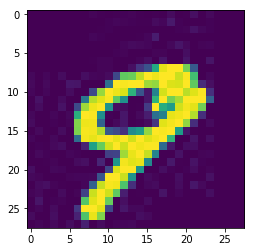

9


In [12]:
plt.imshow(train_data[110,:,:,0])
plt.show()
print(np.argmax(train_label[110]))

In [13]:
main(train_data, train_label)

Instructions for updating:
Use the retry module or similar alternatives.
Stteing up summary op...
Setting Up Saver...
epoch : 0 step : 0 train_loss : 1.3177859 train_accuracy : 0.09375
epoch : 0 step : 10 train_loss : 0.30253273 train_accuracy : 0.21875
epoch : 0 step : 20 train_loss : 0.27768168 train_accuracy : 0.34375
epoch : 0 step : 30 train_loss : 0.22206691 train_accuracy : 0.5625
epoch : 0 step : 40 train_loss : 0.21524191 train_accuracy : 0.53125
epoch : 0 step : 50 train_loss : 0.19855936 train_accuracy : 0.6875
epoch : 0 step : 60 train_loss : 0.18285081 train_accuracy : 0.75
epoch : 0 step : 70 train_loss : 0.16833034 train_accuracy : 0.71875
epoch : 0 step : 80 train_loss : 0.18872587 train_accuracy : 0.59375
epoch : 0 step : 90 train_loss : 0.13447079 train_accuracy : 0.75
epoch : 0 step : 100 train_loss : 0.14584541 train_accuracy : 0.75
epoch : 0 step : 110 train_loss : 0.13622522 train_accuracy : 0.8125
epoch : 0 step : 120 train_loss : 0.16250572 train_accuracy : 0.71

epoch : 0 step : 1130 train_loss : 0.032317482 train_accuracy : 0.96875
epoch : 0 step : 1140 train_loss : 0.032681454 train_accuracy : 0.96875
epoch : 0 step : 1150 train_loss : 0.040781207 train_accuracy : 0.9375
epoch : 0 step : 1160 train_loss : 0.032073896 train_accuracy : 0.9375
epoch : 0 step : 1170 train_loss : 0.035384618 train_accuracy : 0.96875
epoch : 0 step : 1180 train_loss : 0.07964995 train_accuracy : 0.84375
epoch : 0 step : 1190 train_loss : 0.03322433 train_accuracy : 0.96875
epoch : 0 step : 1200 train_loss : 0.050647546 train_accuracy : 0.90625
epoch : 0 step : 1210 train_loss : 0.037105486 train_accuracy : 0.9375
epoch : 0 step : 1220 train_loss : 0.044698954 train_accuracy : 0.96875
epoch : 0 step : 1230 train_loss : 0.030932173 train_accuracy : 0.96875
epoch : 0 step : 1240 train_loss : 0.029090066 train_accuracy : 0.96875
epoch : 0 step : 1250 train_loss : 0.07833554 train_accuracy : 0.9375
epoch : 0 step : 1260 train_loss : 0.02001429 train_accuracy : 1.0
epoc

epoch : 1 step : 990 train_loss : 0.02377719 train_accuracy : 1.0
epoch : 1 step : 1000 train_loss : 0.012708448 train_accuracy : 1.0
epoch : 1 step : 1010 train_loss : 0.029202968 train_accuracy : 1.0
epoch : 1 step : 1020 train_loss : 0.040994443 train_accuracy : 0.9375
epoch : 1 step : 1030 train_loss : 0.023608804 train_accuracy : 0.96875
epoch : 1 step : 1040 train_loss : 0.03301794 train_accuracy : 0.96875
epoch : 1 step : 1050 train_loss : 0.026026497 train_accuracy : 0.9375
epoch : 1 step : 1060 train_loss : 0.020763595 train_accuracy : 1.0
epoch : 1 step : 1070 train_loss : 0.015074539 train_accuracy : 1.0
epoch : 1 step : 1080 train_loss : 0.053128183 train_accuracy : 0.9375
epoch : 1 step : 1090 train_loss : 0.050565057 train_accuracy : 0.90625
epoch : 1 step : 1100 train_loss : 0.024504058 train_accuracy : 0.96875
epoch : 1 step : 1110 train_loss : 0.014273015 train_accuracy : 1.0
epoch : 1 step : 1120 train_loss : 0.023794075 train_accuracy : 1.0
epoch : 1 step : 1130 trai

epoch : 2 step : 860 train_loss : 0.04164518 train_accuracy : 0.9375
epoch : 2 step : 870 train_loss : 0.014690483 train_accuracy : 1.0
epoch : 2 step : 880 train_loss : 0.0063530044 train_accuracy : 1.0
epoch : 2 step : 890 train_loss : 0.015566712 train_accuracy : 0.96875
epoch : 2 step : 900 train_loss : 0.0369052 train_accuracy : 0.96875
epoch : 2 step : 910 train_loss : 0.0110576255 train_accuracy : 1.0
epoch : 2 step : 920 train_loss : 0.011035629 train_accuracy : 1.0
epoch : 2 step : 930 train_loss : 0.021086859 train_accuracy : 0.96875
epoch : 2 step : 940 train_loss : 0.021383256 train_accuracy : 0.96875
epoch : 2 step : 950 train_loss : 0.018362317 train_accuracy : 0.96875
epoch : 2 step : 960 train_loss : 0.04173462 train_accuracy : 0.96875
epoch : 2 step : 970 train_loss : 0.049480774 train_accuracy : 0.9375
epoch : 2 step : 980 train_loss : 0.019513713 train_accuracy : 0.96875
epoch : 2 step : 990 train_loss : 0.046731707 train_accuracy : 0.90625
epoch : 2 step : 1000 trai

epoch : 3 step : 730 train_loss : 0.034746688 train_accuracy : 0.9375
epoch : 3 step : 740 train_loss : 0.020028032 train_accuracy : 0.96875
epoch : 3 step : 750 train_loss : 0.025193628 train_accuracy : 0.96875
epoch : 3 step : 760 train_loss : 0.035498597 train_accuracy : 0.96875
epoch : 3 step : 770 train_loss : 0.031850092 train_accuracy : 0.96875
epoch : 3 step : 780 train_loss : 0.01408612 train_accuracy : 1.0
epoch : 3 step : 790 train_loss : 0.014315942 train_accuracy : 1.0
epoch : 3 step : 800 train_loss : 0.077074066 train_accuracy : 0.90625
epoch : 3 step : 810 train_loss : 0.04007699 train_accuracy : 0.90625
epoch : 3 step : 820 train_loss : 0.021203104 train_accuracy : 1.0
epoch : 3 step : 830 train_loss : 0.0054874243 train_accuracy : 1.0
epoch : 3 step : 840 train_loss : 0.004920434 train_accuracy : 1.0
epoch : 3 step : 850 train_loss : 0.021188457 train_accuracy : 0.96875
epoch : 3 step : 860 train_loss : 0.025842125 train_accuracy : 0.96875
epoch : 3 step : 870 train_l

epoch : 4 step : 600 train_loss : 0.041705888 train_accuracy : 0.96875
epoch : 4 step : 610 train_loss : 0.009507842 train_accuracy : 1.0
epoch : 4 step : 620 train_loss : 0.017063837 train_accuracy : 1.0
epoch : 4 step : 630 train_loss : 0.03144847 train_accuracy : 0.9375
epoch : 4 step : 640 train_loss : 0.006147337 train_accuracy : 1.0
epoch : 4 step : 650 train_loss : 0.04045901 train_accuracy : 0.9375
epoch : 4 step : 660 train_loss : 0.019653667 train_accuracy : 0.96875
epoch : 4 step : 670 train_loss : 0.02594558 train_accuracy : 0.9375
epoch : 4 step : 680 train_loss : 0.0070167063 train_accuracy : 1.0
epoch : 4 step : 690 train_loss : 0.022604417 train_accuracy : 0.9375
epoch : 4 step : 700 train_loss : 0.011834916 train_accuracy : 1.0
epoch : 4 step : 710 train_loss : 0.0113264145 train_accuracy : 0.96875
epoch : 4 step : 720 train_loss : 0.024974672 train_accuracy : 0.96875
epoch : 4 step : 730 train_loss : 0.013123671 train_accuracy : 1.0
epoch : 4 step : 740 train_loss : 0

epoch : 5 step : 470 train_loss : 0.010435162 train_accuracy : 0.96875
epoch : 5 step : 480 train_loss : 0.0117001 train_accuracy : 1.0
epoch : 5 step : 490 train_loss : 0.015439667 train_accuracy : 1.0
epoch : 5 step : 500 train_loss : 0.026651945 train_accuracy : 1.0
epoch : 5 step : 510 train_loss : 0.014636809 train_accuracy : 0.96875
epoch : 5 step : 520 train_loss : 0.017674804 train_accuracy : 0.96875
epoch : 5 step : 530 train_loss : 0.021289306 train_accuracy : 1.0
epoch : 5 step : 540 train_loss : 0.0065048793 train_accuracy : 1.0
epoch : 5 step : 550 train_loss : 0.008508761 train_accuracy : 1.0
epoch : 5 step : 560 train_loss : 0.011512331 train_accuracy : 1.0
epoch : 5 step : 570 train_loss : 0.025950555 train_accuracy : 0.9375
epoch : 5 step : 580 train_loss : 0.016637342 train_accuracy : 0.96875
epoch : 5 step : 590 train_loss : 0.0057091466 train_accuracy : 1.0
epoch : 5 step : 600 train_loss : 0.011198446 train_accuracy : 0.96875
epoch : 5 step : 610 train_loss : 0.025

epoch : 6 step : 340 train_loss : 0.012066011 train_accuracy : 1.0
epoch : 6 step : 350 train_loss : 0.009737238 train_accuracy : 1.0
epoch : 6 step : 360 train_loss : 0.03333758 train_accuracy : 0.96875
epoch : 6 step : 370 train_loss : 0.023253389 train_accuracy : 0.96875
epoch : 6 step : 380 train_loss : 0.012203639 train_accuracy : 0.96875
epoch : 6 step : 390 train_loss : 0.016984154 train_accuracy : 0.96875
epoch : 6 step : 400 train_loss : 0.010739206 train_accuracy : 1.0
epoch : 6 step : 410 train_loss : 0.009974025 train_accuracy : 1.0
epoch : 6 step : 420 train_loss : 0.0076299086 train_accuracy : 1.0
epoch : 6 step : 430 train_loss : 0.011085589 train_accuracy : 1.0
epoch : 6 step : 440 train_loss : 0.016445363 train_accuracy : 0.96875
epoch : 6 step : 450 train_loss : 0.018003002 train_accuracy : 0.96875
epoch : 6 step : 460 train_loss : 0.0040754476 train_accuracy : 1.0
epoch : 6 step : 470 train_loss : 0.006572587 train_accuracy : 1.0
epoch : 6 step : 480 train_loss : 0.0

epoch : 7 step : 220 train_loss : 0.014993245 train_accuracy : 1.0
epoch : 7 step : 230 train_loss : 0.00758542 train_accuracy : 1.0
epoch : 7 step : 240 train_loss : 0.010922451 train_accuracy : 1.0
epoch : 7 step : 250 train_loss : 0.011786712 train_accuracy : 1.0
epoch : 7 step : 260 train_loss : 0.007494781 train_accuracy : 1.0
epoch : 7 step : 270 train_loss : 0.016805327 train_accuracy : 0.96875
epoch : 7 step : 280 train_loss : 0.0038247793 train_accuracy : 1.0
epoch : 7 step : 290 train_loss : 0.008963722 train_accuracy : 1.0
epoch : 7 step : 300 train_loss : 0.018434307 train_accuracy : 0.96875
epoch : 7 step : 310 train_loss : 0.03122257 train_accuracy : 0.96875
epoch : 7 step : 320 train_loss : 0.017365549 train_accuracy : 0.96875
epoch : 7 step : 330 train_loss : 0.014553098 train_accuracy : 0.96875
epoch : 7 step : 340 train_loss : 0.011917824 train_accuracy : 1.0
epoch : 7 step : 350 train_loss : 0.005210967 train_accuracy : 1.0
epoch : 7 step : 360 train_loss : 0.0189855

epoch : 8 step : 100 train_loss : 0.005134184 train_accuracy : 1.0
epoch : 8 step : 110 train_loss : 0.01637147 train_accuracy : 0.9375
epoch : 8 step : 120 train_loss : 0.008928528 train_accuracy : 1.0
epoch : 8 step : 130 train_loss : 0.0044800825 train_accuracy : 1.0
epoch : 8 step : 140 train_loss : 0.02650683 train_accuracy : 0.96875
epoch : 8 step : 150 train_loss : 0.005915899 train_accuracy : 1.0
epoch : 8 step : 160 train_loss : 0.0049091526 train_accuracy : 1.0
epoch : 8 step : 170 train_loss : 0.005092754 train_accuracy : 1.0
epoch : 8 step : 180 train_loss : 0.01873063 train_accuracy : 1.0
epoch : 8 step : 190 train_loss : 0.019802969 train_accuracy : 0.96875
epoch : 8 step : 200 train_loss : 0.002459182 train_accuracy : 1.0
epoch : 8 step : 210 train_loss : 0.027370283 train_accuracy : 1.0
epoch : 8 step : 220 train_loss : 0.0075459084 train_accuracy : 1.0
epoch : 8 step : 230 train_loss : 0.010719983 train_accuracy : 0.96875
epoch : 8 step : 240 train_loss : 0.018013021 t

epoch : 8 step : 1300 train_loss : 0.032413427 train_accuracy : 0.96875
epoch : 8 step : 1310 train_loss : 0.009569184 train_accuracy : 1.0
epoch : 9 step : 0 train_loss : 0.0034307302 train_accuracy : 1.0
epoch : 9 step : 10 train_loss : 0.009073618 train_accuracy : 0.96875
epoch : 9 step : 20 train_loss : 0.010304397 train_accuracy : 1.0
epoch : 9 step : 30 train_loss : 0.03408166 train_accuracy : 0.96875
epoch : 9 step : 40 train_loss : 0.013996765 train_accuracy : 0.96875
epoch : 9 step : 50 train_loss : 0.011173446 train_accuracy : 1.0
epoch : 9 step : 60 train_loss : 0.0050095334 train_accuracy : 1.0
epoch : 9 step : 70 train_loss : 0.013388669 train_accuracy : 1.0
epoch : 9 step : 80 train_loss : 0.010496975 train_accuracy : 1.0
epoch : 9 step : 90 train_loss : 0.022400528 train_accuracy : 0.96875
epoch : 9 step : 100 train_loss : 0.008111282 train_accuracy : 0.96875
epoch : 9 step : 110 train_loss : 0.011512206 train_accuracy : 1.0
epoch : 9 step : 120 train_loss : 0.0046712635

KeyboardInterrupt: 

In [ ]:
# Resource
# https://stackoverflow.com/questions/29831489/numpy-1-hot-array

In [ ]:
#Accuracy after 9 epochs =96.875%